In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# 1. Load the dataset into python environment

In [7]:
data=pd.read_csv('titanic_dataset.csv')

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column

In [9]:
data1 = pd.read_csv('titanic_dataset.csv', index_col='PassengerId')

In [10]:
data1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
data1.shape

(891, 11)

In [13]:
data1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in all the missing values present in all the columns in the dataset

In [15]:
data1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [16]:
data1['Age']=data1['Age'].fillna(data1['Age'].mean())

In [17]:
for col in ['Cabin', 'Embarked']:
    data1[col] = data1[col].fillna(data1[col].mode()[0])

In [18]:
data1.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset


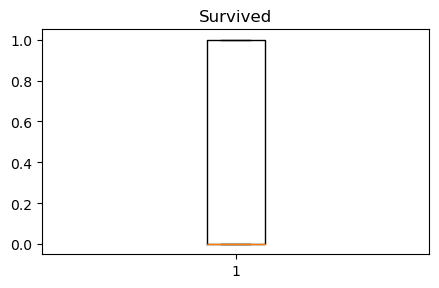

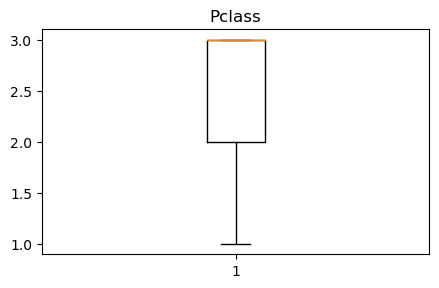

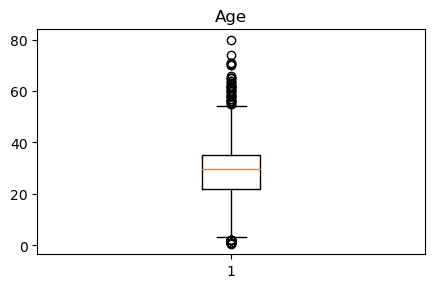

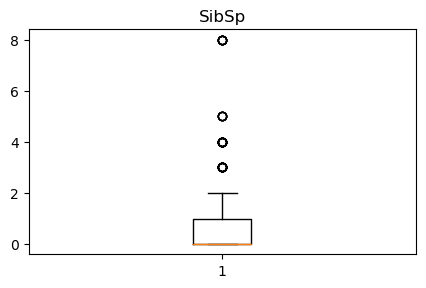

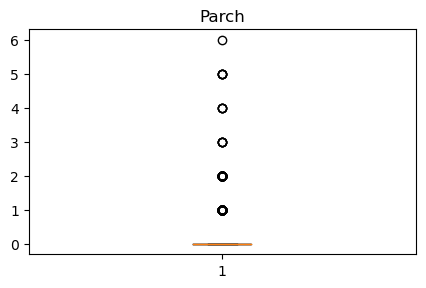

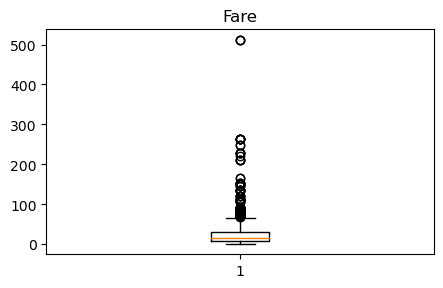

In [19]:
num_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

for i in num_cols:
    plt.figure(figsize=(5,2.92))
    plt.boxplot(data1[i])
    plt.title(i)

In [20]:
Q1 = np.percentile(data1['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data1['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data1['Age'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 22.0
Q2 = 29.69911764705882
Q3 = 35.0


C:\Users\USER\AppData\Local\Temp\ipykernel_21692\2496350676.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data1['Age'],25,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_21692\2496350676.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data1['Age'],50,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_21692\2496350676.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher',

In [21]:
IQR = Q3 - Q1

In [22]:
print (' IQR =', IQR)

 IQR = 13.0


In [23]:
up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

In [24]:
print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  54.5
low_lim =  2.5


In [25]:
data1['Age'] = np.where(data1['Age'] > up_lim, up_lim, np.where(data1['Age'] < low_lim, low_lim, data1['Age']))

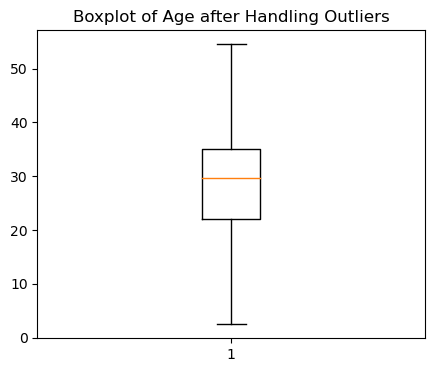

In [27]:
plt.figure(figsize=(5, 4))
plt.boxplot(data1['Age'])
plt.title('Boxplot of Age after Handling Outliers')
plt.show()

In [28]:
Q1 = np.percentile(data1['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(data1['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(data1['SibSp'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 0.0
Q2 = 0.0
Q3 = 1.0


C:\Users\USER\AppData\Local\Temp\ipykernel_21692\3847894993.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data1['SibSp'],25,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_21692\3847894993.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data1['SibSp'],50,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_21692\3847894993.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'high

In [29]:
IQR = Q3 - Q1

In [30]:
print (' IQR =', IQR)

 IQR = 1.0


In [31]:
up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

In [32]:
print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  2.5
low_lim =  -1.5


In [33]:
data1['SibSp'] = np.where(data1['SibSp'] > up_lim, up_lim, np.where(data1['SibSp'] < low_lim, low_lim, data1['SibSp']))

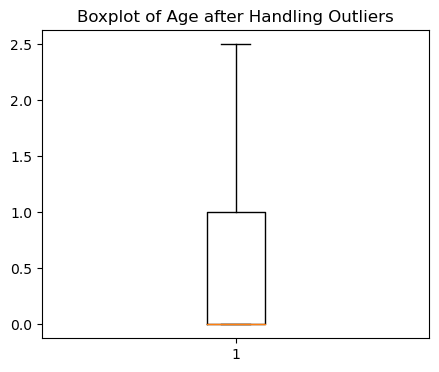

In [34]:
plt.figure(figsize=(5, 4))
plt.boxplot(data1['SibSp'])
plt.title('Boxplot of Age after Handling Outliers')
plt.show()

In [35]:
Q1 = np.percentile(data1['Parch'],25,interpolation='midpoint')
Q2 = np.percentile(data1['Parch'],50,interpolation='midpoint')
Q3 = np.percentile(data1['Parch'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 0.0
Q2 = 0.0
Q3 = 0.0


C:\Users\USER\AppData\Local\Temp\ipykernel_21692\2735082539.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data1['Parch'],25,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_21692\2735082539.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data1['Parch'],50,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_21692\2735082539.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'high

In [36]:
IQR = Q3 - Q1

In [37]:
print (' IQR =', IQR)

 IQR = 0.0


In [38]:
up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

In [39]:
print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  0.0
low_lim =  0.0


In [40]:
data1['Parch'] = np.where(data1['Parch'] > up_lim, up_lim, np.where(data1['Parch'] < low_lim, low_lim, data1['Parch']))

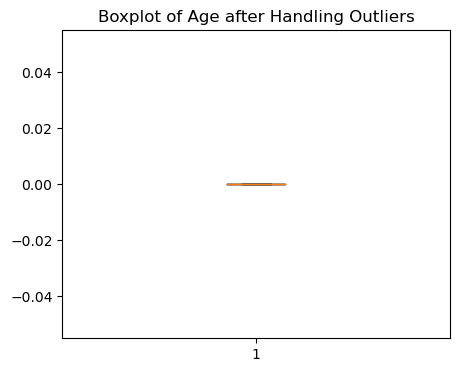

In [41]:
plt.figure(figsize=(5, 4))
plt.boxplot(data1['Parch'])
plt.title('Boxplot of Age after Handling Outliers')
plt.show()

In [42]:
Q1 = np.percentile(data1['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data1['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data1['Fare'],75,interpolation='midpoint')

print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 7.9104
Q2 = 14.4542
Q3 = 31.0


C:\Users\USER\AppData\Local\Temp\ipykernel_21692\210282532.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data1['Fare'],25,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_21692\210282532.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data1['Fare'],50,interpolation='midpoint')
C:\Users\USER\AppData\Local\Temp\ipykernel_21692\210282532.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', 

In [43]:
IQR = Q3 - Q1

In [44]:
print (' IQR =', IQR)

 IQR = 23.0896


In [45]:
up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR

In [46]:
print ('up_lim = ', up_lim)
print ('low_lim = ', low_lim)

up_lim =  65.6344
low_lim =  -26.724


In [47]:
data1['Fare'] = np.where(data1['Fare'] > up_lim, up_lim, np.where(data1['Fare'] < low_lim, low_lim, data1['Fare']))

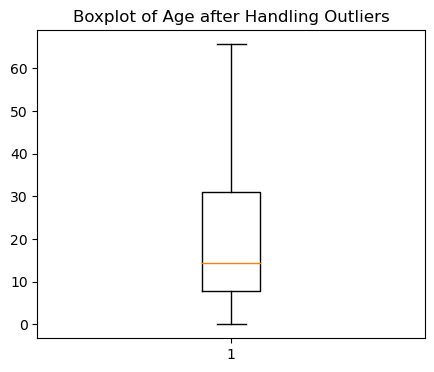

In [48]:
plt.figure(figsize=(5, 4))
plt.boxplot(data1['Fare'])
plt.title('Boxplot of Age after Handling Outliers')
plt.show()

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
X = data1.drop('Survived', axis=1)
y = data1['Survived']
X1 = X.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis = 1)
X1.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1.0,0.0,7.2500
2,1,38.0,1.0,0.0,65.6344
3,3,26.0,0.0,0.0,7.9250
4,1,35.0,1.0,0.0,53.1000
5,3,35.0,0.0,0.0,8.0500


In [51]:
min_max = MinMaxScaler()

In [53]:
X1 = min_max.fit_transform(X1)

In [54]:
type(X1)

numpy.ndarray

In [56]:
X1 = pd.DataFrame(X1,columns = ['Pclass','Age','SibSp','Parch','Fare'])

In [57]:
X1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.0,891.000000
mean,0.654321,0.516862,0.170595,0.0,0.366375
std,0.418036,0.231962,0.283298,0.0,0.312056
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.500000,0.375000,0.000000,0.0,0.120522
50%,1.000000,0.523060,0.000000,0.0,0.220223
75%,1.000000,0.625000,0.400000,0.0,0.472313
max,1.000000,1.000000,1.000000,0.0,1.000000
